# STAT 207 Lab Assignment 3 - Individual Part - [25 total points]

## Probability and Sampling Distributions

Due: Tuesday, September 14, 11:59pm CST

<hr>


### Imports

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
cards = pd.read_csv('cards.csv')
cards

color     suit face
0   black     club    A
1   black     club    2
2   black     club    3
3   black     club    4
4   black     club    5
5   black     club    6
6   black     club    7
7   black     club    8
8   black     club    9
9   black     club   10
10  black     club    J
11  black     club    Q
12  black     club    K
13  black    spade    A
14  black    spade    2
15  black    spade    3
16  black    spade    4
17  black    spade    5
18  black    spade    6
19  black    spade    7
20  black    spade    8
21  black    spade    9
22  black    spade   10
23  black    spade    J
24  black    spade    Q
25  black    spade    K
26    red  diamond    A
27    red  diamond    2
28    red  diamond    3
29    red  diamond    4
30    red  diamond    5
31    red  diamond    6
32    red  diamond    7
33    red  diamond    8
34    red  diamond    9
35    red  diamond   10
36    red  diamond    J
37    red  diamond    Q
38    red  diamond    K
39    red    heart    A
40    red    heart    2
41    red    heart    3
42    red    heart    4
43    red    heart    5
44    red    heart    6
45    red    heart    7
46    red    heart    8
47    red    heart    9
48    red    heart   10
49    red    heart    J
50    red    heart    Q
51    red    heart    K

## <u>Case Study</u>: 'Four of a Kind' Poker Hand Analysis

In poker, a 'four of a kind' is a drawn hand (of 5 cards) that contains four cards of one face and another 1 card of a second face. One example of a 'four of a kind' poker hand is: 9♣ 9♠ 9♦ 9♥ J♥.

### 1. [4 pt] Calculating the Probability of a 'Four of a Kind' Hand *Theoretically* 

Calculate the *theoretical* probability of drawing a 'four of a kind' hand from a 52 card playing deck.

* <u>Hint</u>: Remember, when we draw a hand in poker, we draw the five cards without replacement and the order of cards that you selected doesn't matter.

**Show your work and calculations!**

<hr>

In [15]:
possible_5_cards = (52 * 51 * 50 * 49 * 48) / 120
possible_5_cards

2598960.0

In [16]:
possible_four_of_kind = 13 * 1 * 48
possible_four_of_kind

624

In [17]:
prob_of_four = possible_four_of_kind / possible_5_cards
prob_of_four

0.00024009603841536616

### 2. *Approximating* the Probability of a 'Four of a Kind' Hand 

We have created two test hands below in the form of dataframes.
1. **hand1** is a 'four of a kind' hand.
2. **hand2** is not a 'four of a kind' hand.

In [18]:
hand1 = pd.DataFrame({'face': ['J','J','J','9','J'],
                           'suit': ['heart', 'club', 'spade', 'club', 'diamond']})
hand1

face     suit
0    J    heart
1    J     club
2    J    spade
3    9     club
4    J  diamond

In [19]:
hand2 = pd.DataFrame({'face': ['J','J','Q','9','J'],
                           'suit': ['heart', 'club', 'spade', 'club', 'diamond']})
hand2

face     suit
0    J    heart
1    J     club
2    Q    spade
3    9     club
4    J  diamond

#### 2.1. [3 pt] Function that Tests if a Hand is a 'Four of a Kind'

a. Create a function that returns a True if the dataframe (that represents a poker hand) is a 'four of a kind' hand and returns False if it is not a 'four of a kind' hand.

b. Then use this function on the **hand1** and **hand2** dataframes to test your results.

In [20]:
hand1 = pd.DataFrame({'face':['2','2','2','2','3'], 'suit' : ['heart', 'club', 'spade', 'diamond', 'diamond']})
hand1

face     suit
0    2    heart
1    2     club
2    2    spade
3    2  diamond
4    3  diamond

In [21]:
hand1['face'].value_counts()

2    4
3    1
Name: face, dtype: int64

In [22]:
def isFourOfKind(df, var = 'face'):
    if df[var].shape[0] != 5:
        return 'Not a poker hand'
    else:
        counts = df[var].value_counts()
        if counts.min() == 1 and counts.max() == 4:
            return True
        else:
            return False

In [23]:
isFourOfKind(hand1)

True

In [24]:
hand2 = pd.DataFrame({'face':['5','5','5','6','Q'], 'suit' : ['heart', 'club', 'spade', 'diamond', 'club']})
isFourOfKind(hand2)

False

#### 2.2. [3 pt] Approximating the probability that a randomly drawn hand is a 'four of a kind' hand.

Using the cards.csv file attached to this lab, conduct a simulation that does the following.

1. Simulate drawing 10000 hands (ie. 5 cards) from the 52 card deck. Each trial is randomly sampled without replacement. (But you can assume that after each trial, the 5 drawn cards were put back in the deck).
2. Tests whether the trial hand is a 'four of a kind' hand.
3. Calculates the proportion of the 10000 hands that were a four of a kind' hand.

This proportion will be your approximated probability of drawing a 'four of a kind' hand in poker.

**Warning: Using print statements (depending on how large of an object you're printing) may cause your notebook to crash with for loops with lots of iterations.**

In [25]:
four_of_kind_count = 0
n_iter = 10000
for i in range(n_iter):
    new_hand = cards.sample(5)
    four_of_kind_count += isFourOfKind(new_hand)

In [26]:
print('Probability estimate based on', n_iter, 'iterations:', four_of_kind_count/n_iter)

Probability estimate based on 10000 iterations: 0.0003


### 3. [0.5 pt] Comparison of Theoretical and Approximated Probabilities

What is the difference between your theoretical probability that you calculated in #1 and your approximated probability that you calculated in 2.2?

The difference between the theoretical probability and the approximated probability is 0.0004

<hr>

## <u>Case Study</u>: Champaign County and Surrounding Counties Multi-Unit Housing Structure Analysis

The county.csv file attached contains various statistics about each county in the United States. You can read more about this dataset and what the variables mean here: https://www.openintro.org/data/index.php?data=county

**Champaign County**

Because Champaign County in Illinois is home to UIUC, in which a lot of students and young adults live in apartments, we have a conjecture that this county will have a high percent of housing units in multi-unit structures. The multi_unit column in this csv contains the percent of housing units in each county that are in multi-unit structures. 

**Champaign County and Neighboring Counties**

Because of the research park at UIUC, could it also be the case that there are lots of young adults that live in apartments in counties that are close to Champaign county? In addition, if we look at Champaign county, as well as the four neighboring counties (Vermilion, Ford, Piatt, and Douglas) and calculate the **average** multi_unit rate, will this average multi_unit rate be higher than the average multi_unit rate of five counties that were randomly selected from the population of U.S. counties?

### 4. Data Basics

#### 4.1. [0.5 pt] Read the county csv file into a dataframe and show the first five rows.

**<u>Note</u>: This csv file does have some missing values, but the multi_unit variable does not have any missing values. Because we will only be using the multi_unit variable in this analysis we do not need to worry about cleaning the dataframe or dropping any rows with missing values for now.**

In [27]:
county = pd.read_csv('county.csv')
county.head(5)

name    state pop2000  pop2010 pop2017 pop_change poverty  \
0  Autauga County  Alabama   43671    54571   55504       1.48    13.7   
1  Baldwin County  Alabama  140415   182265  212628       9.19    11.8   
2  Barbour County  Alabama   29038    27457   25270      -6.22    27.2   
3     Bibb County  Alabama   20826    22915   22668       0.73    15.2   
4   Blount County  Alabama   51024    57322   58013       0.68    15.6   

   homeownership  multi_unit unemployment_rate metro    median_edu  \
0           77.5         7.2              3.86   yes  some_college   
1           76.7        22.6              3.99   yes  some_college   
2           68.0        11.1               5.9    no    hs_diploma   
3           82.9         6.6              4.39   yes    hs_diploma   
4           82.0         3.7              4.02   yes    hs_diploma   

  per_capita_income median_hh_income smoking_ban  
0           27841.7            55317        none  
1          27779.85            52562        none  
2          17891.73            33368     partial  
3          20572.05            43404        none  
4          21367.39            47412        none

#### <u>Tutorial</u>: Row filtering for multiple conditions


In [28]:
tmp=pd.DataFrame({'x':[3,3,10,10], 'y':[100,101,100,22]})
tmp

x    y
0   3  100
1   3  101
2  10  100
3  10   22

We can use the **&** (ie. and) operator to represent that we want **both** conditions on either side of it "(condition 1 in parantheses) & (condition 2 in parantheses)" to be met.

In [29]:
tmp[(tmp['x']==3) & (tmp['y']==100)]

x    y
0  3  100

We can use the **|** (ie. or) operator to represent that we want **either** condition on either side of it "(condition 1 in parantheses) | (condition 2 in parantheses)" to be met.

In [30]:
tmp[(tmp['x']==3) | (tmp['y']==100)]

x    y
0   3  100
1   3  101
2  10  100

We can use these operator together to express more complicated conditions.

In [31]:
tmp[((tmp['x']==3) & (tmp['y']==100)) | ((tmp['x']==10) & (tmp['y']==22))]

x    y
0   3  100
3  10   22

#### 4.2. [1 pt] Display just the row for Champaign County, Illinois.

In [32]:
county[(county['name'] == 'Champaign County') & (county['state'] == 'Illinois')]

name     state pop2000  pop2010 pop2017 pop_change poverty  \
604  Champaign County  Illinois  179669   201081  209399       1.83    21.4   

     homeownership  multi_unit unemployment_rate metro    median_edu  \
604           55.9        35.2              4.24   yes  some_college   

    per_capita_income median_hh_income       smoking_ban  
604          29619.49            49586  data unavailable

#### 4.3. [1 pt] Calculate the proportion of counties in this dataset have a multi_unit rate that is at least as high as Champaign county's.

In [33]:
mu_rate_calc = county[county['multi_unit'] >= 35.2]
mu_rate = mu_rate_calc['multi_unit'].count()

In [34]:
prop_of_counties = mu_rate / (county['multi_unit'].count())
prop_of_counties

0.02864417568427753

### 5. Sample Analysis

#### 5.1. [2 pt] Neighboring County Sample Creation
Now create a dataframe that is just comprised of the five following Illinois counties:
* Champaign
* Vermilion
* Ford
* Piatt
* Douglas

Show this dataframe.

In [35]:
il_df = county[(county['name'] == 'Champaign County') | (county['name'] == 'Vermilion County') | (county['name'] == 'Ford County') | (county['name'] == 'Piatt County') | (county['name'] == 'Douglas County')]
il_df

name         state pop2000  pop2010 pop2017 pop_change  \
262     Douglas County      Colorado  175766   285465  335299       9.59   
434     Douglas County       Georgia   92174   132403  143882       5.67   
604   Champaign County      Illinois  179669   201081  209399       1.83   
615     Douglas County      Illinois   19922    19980   19748      -0.57   
621        Ford County      Illinois   14241    14081   13280      -2.86   
668       Piatt County      Illinois   16365    16729   16445       0.09   
686   Vermilion County      Illinois   83919    81625   77909      -3.31   
910     Douglas County        Kansas   99962   110826  120793       5.45   
916        Ford County        Kansas   32458    33848   34381      -1.59   
1334    Douglas County     Minnesota   32821    36009   37575        3.4   
1516    Douglas County      Missouri   13084    13684   13300      -1.01   
1681    Douglas County      Nebraska  463585   517110  561620       4.48   
1749    Douglas County        Nevada   41259    46997   48309       2.85   
2053  Champaign County          Ohio   38890    40097   38840      -1.54   
2217    Douglas County        Oregon  100399   107667  109405       2.67   
2382    Douglas County  South Dakota    3458     3002    2931      -1.51   
2961    Douglas County    Washington   32603    38431   41945       6.36   
3062    Douglas County     Wisconsin   43287    44159   43284      -1.03   

     poverty  homeownership  multi_unit unemployment_rate metro    median_edu  \
262      3.6           82.5        14.9              2.39   yes     bachelors   
434     14.2           71.5        16.1              4.89   yes  some_college   
604     21.4           55.9        35.2              4.24   yes  some_college   
615     12.1           78.3        11.2              4.01    no    hs_diploma   
621     15.7           79.1         7.9               4.7   yes  some_college   
668      5.4           81.7         7.5              3.99   yes  some_college   
686     19.8           71.3        14.5              6.29   yes    hs_diploma   
910     18.7           53.5        32.0              3.16   yes  some_college   
916     16.2           68.3        18.6              2.79    no    hs_diploma   
1334     8.4           76.1        14.3              3.19    no  some_college   
1516    20.6           82.0         5.5              4.73    no    hs_diploma   
1681    13.5           64.4        26.9              3.18   yes  some_college   
1749     9.8           76.2        11.4               4.8    no  some_college   
2053    11.1           75.3        14.7              4.16    no    hs_diploma   
2217      17           70.6        12.1              5.35    no  some_college   
2382     8.2           77.1         7.4              2.96    no  some_college   
2961    13.7           71.9        13.5              5.71   yes  some_college   
3062    14.2           69.8        20.1              4.48   yes  some_college   

     per_capita_income median_hh_income       smoking_ban  
262           48499.64           111154           partial  
434           24947.04            59333           partial  
604           29619.49            49586  data unavailable  
615           25796.91            52261           partial  
621           27234.78            50851              none  
668           33598.78            67360  data unavailable  
686           23759.02            44930  data unavailable  
910           30301.65            54370           partial  
916           21602.33            49890              none  
1334          34052.89            58667           partial  
1516          17574.22            33003           partial  
1681          32139.84            58640           partial  
1749          35501.29            61176           partial  
2053           25704.8            54495  data unavailable  
2217          25122.46            44023           partial  
2382          29843.95            52543           partial  
2961         

#### 5.2. [1 pt] Calculate the mean multi_unit rate of this sample of five counties that you created in 5.1.

In [36]:
county['multi_unit'].mean()

12.321896880967534

### 6. Sampling Distribution

#### 6.1. [3 pt] Sampling Distribution Creation

Consider the entire dataframe of counties (from counties.csv) to be a population. From this population, create a **sampling distribution** of **sample mean multi_unit rates** with the following specifications:
* all of the samples collected should be of size $n=5$
* your sampling distribution should be comprised of 5000 sample means.

In [37]:
n = 5
sample_dist = 5000

x = 'multi_unit'
sample_means = []
for i in range(sample_dist):
    print('Trial Number:',i)
    rand_sample = county[x].sample(n, replace = True)
    print('Random Sample')
    print(rand_sample)
    
    rand_sample_mean = rand_sample.mean()
    print('Random Sample Mean')
    print(rand_sample_mean)
    
    sample_means.append(rand_sample_mean)
    print(sample_means)
    print('----------------------------------')
    
print('Sampling Distribution of Sample Means (samples of size n = 5)')
print(pd.DataFrame({x : sample_means}))

Trial Number: 0
Random Sample
2782    15.9
196     11.4
1810    21.5
2498    22.0
311     23.5
Name: multi_unit, dtype: float64
Random Sample Mean
18.86
[18.86]
----------------------------------
Trial Number: 1
Random Sample
2400    13.9
2448     7.5
166     11.5
2010     7.8
1461    12.8
Name: multi_unit, dtype: float64
Random Sample Mean
10.7
[18.86, 10.7]
----------------------------------
Trial Number: 2
Random Sample
255     4.1
2555    1.3
1487    7.5
2701    8.3
1944    8.4
Name: multi_unit, dtype: float64
Random Sample Mean
5.92
[18.86, 10.7, 5.92]
----------------------------------
Trial Number: 3
Random Sample
1358    10.5
2223    11.2
279     21.4
820     10.3
1510     6.8
Name: multi_unit, dtype: float64
Random Sample Mean
12.039999999999997
[18.86, 10.7, 5.92, 12.039999999999997]
----------------------------------
Trial Number: 4
Random Sample
10       4.4
1236     5.4
773      8.1
353     10.8
550     38.9
Name: multi_unit, dtype: float64
Random Sample Mean
13.52
[18.86,

[18.86, 10.7, 5.92, 12.039999999999997, 13.52, 15.039999999999997, 4.88, 6.56, 15.26, 12.16, 7.2, 3.9799999999999995, 7.779999999999999, 18.16, 8.78, 24.48, 15.3, 11.760000000000002, 23.84, 13.580000000000002, 12.819999999999999, 13.26, 13.679999999999998, 14.74, 10.68, 9.88, 12.74, 7.06, 13.639999999999997, 13.48, 13.919999999999998, 10.440000000000001, 14.8, 11.6, 17.16, 8.52, 10.280000000000001, 11.459999999999999, 11.440000000000001, 20.04, 18.580000000000002, 11.120000000000001, 16.12, 15.280000000000001, 18.779999999999998, 10.040000000000001, 8.14, 8.459999999999999, 11.940000000000001, 13.940000000000001, 19.259999999999998, 10.7, 9.200000000000001, 11.76, 15.38, 18.759999999999998, 14.080000000000002, 17.199999999999996, 13.319999999999999, 7.5, 10.54, 5.4799999999999995, 7.980000000000001, 11.739999999999998, 10.42, 13.040000000000001, 8.66, 12.9, 12.22, 13.24, 10.1, 9.040000000000001, 6.720000000000001, 10.280000000000001, 14.560000000000002, 13.439999999999998, 13.02, 9.940

Name: multi_unit, dtype: float64
Random Sample Mean
4.6
[18.86, 10.7, 5.92, 12.039999999999997, 13.52, 15.039999999999997, 4.88, 6.56, 15.26, 12.16, 7.2, 3.9799999999999995, 7.779999999999999, 18.16, 8.78, 24.48, 15.3, 11.760000000000002, 23.84, 13.580000000000002, 12.819999999999999, 13.26, 13.679999999999998, 14.74, 10.68, 9.88, 12.74, 7.06, 13.639999999999997, 13.48, 13.919999999999998, 10.440000000000001, 14.8, 11.6, 17.16, 8.52, 10.280000000000001, 11.459999999999999, 11.440000000000001, 20.04, 18.580000000000002, 11.120000000000001, 16.12, 15.280000000000001, 18.779999999999998, 10.040000000000001, 8.14, 8.459999999999999, 11.940000000000001, 13.940000000000001, 19.259999999999998, 10.7, 9.200000000000001, 11.76, 15.38, 18.759999999999998, 14.080000000000002, 17.199999999999996, 13.319999999999999, 7.5, 10.54, 5.4799999999999995, 7.980000000000001, 11.739999999999998, 10.42, 13.040000000000001, 8.66, 12.9, 12.22, 13.24, 10.1, 9.040000000000001, 6.720000000000001, 10.2800000000000

[18.86, 10.7, 5.92, 12.039999999999997, 13.52, 15.039999999999997, 4.88, 6.56, 15.26, 12.16, 7.2, 3.9799999999999995, 7.779999999999999, 18.16, 8.78, 24.48, 15.3, 11.760000000000002, 23.84, 13.580000000000002, 12.819999999999999, 13.26, 13.679999999999998, 14.74, 10.68, 9.88, 12.74, 7.06, 13.639999999999997, 13.48, 13.919999999999998, 10.440000000000001, 14.8, 11.6, 17.16, 8.52, 10.280000000000001, 11.459999999999999, 11.440000000000001, 20.04, 18.580000000000002, 11.120000000000001, 16.12, 15.280000000000001, 18.779999999999998, 10.040000000000001, 8.14, 8.459999999999999, 11.940000000000001, 13.940000000000001, 19.259999999999998, 10.7, 9.200000000000001, 11.76, 15.38, 18.759999999999998, 14.080000000000002, 17.199999999999996, 13.319999999999999, 7.5, 10.54, 5.4799999999999995, 7.980000000000001, 11.739999999999998, 10.42, 13.040000000000001, 8.66, 12.9, 12.22, 13.24, 10.1, 9.040000000000001, 6.720000000000001, 10.280000000000001, 14.560000000000002, 13.439999999999998, 13.02, 9.940

Random Sample
1029    25.5
761      6.7
2697    10.3
842      6.8
1100     5.7
Name: multi_unit, dtype: float64
Random Sample Mean
11.0
[18.86, 10.7, 5.92, 12.039999999999997, 13.52, 15.039999999999997, 4.88, 6.56, 15.26, 12.16, 7.2, 3.9799999999999995, 7.779999999999999, 18.16, 8.78, 24.48, 15.3, 11.760000000000002, 23.84, 13.580000000000002, 12.819999999999999, 13.26, 13.679999999999998, 14.74, 10.68, 9.88, 12.74, 7.06, 13.639999999999997, 13.48, 13.919999999999998, 10.440000000000001, 14.8, 11.6, 17.16, 8.52, 10.280000000000001, 11.459999999999999, 11.440000000000001, 20.04, 18.580000000000002, 11.120000000000001, 16.12, 15.280000000000001, 18.779999999999998, 10.040000000000001, 8.14, 8.459999999999999, 11.940000000000001, 13.940000000000001, 19.259999999999998, 10.7, 9.200000000000001, 11.76, 15.38, 18.759999999999998, 14.080000000000002, 17.199999999999996, 13.319999999999999, 7.5, 10.54, 5.4799999999999995, 7.980000000000001, 11.739999999999998, 10.42, 13.040000000000001, 8.66, 

Name: multi_unit, dtype: float64
Random Sample Mean
17.78
[18.86, 10.7, 5.92, 12.039999999999997, 13.52, 15.039999999999997, 4.88, 6.56, 15.26, 12.16, 7.2, 3.9799999999999995, 7.779999999999999, 18.16, 8.78, 24.48, 15.3, 11.760000000000002, 23.84, 13.580000000000002, 12.819999999999999, 13.26, 13.679999999999998, 14.74, 10.68, 9.88, 12.74, 7.06, 13.639999999999997, 13.48, 13.919999999999998, 10.440000000000001, 14.8, 11.6, 17.16, 8.52, 10.280000000000001, 11.459999999999999, 11.440000000000001, 20.04, 18.580000000000002, 11.120000000000001, 16.12, 15.280000000000001, 18.779999999999998, 10.040000000000001, 8.14, 8.459999999999999, 11.940000000000001, 13.940000000000001, 19.259999999999998, 10.7, 9.200000000000001, 11.76, 15.38, 18.759999999999998, 14.080000000000002, 17.199999999999996, 13.319999999999999, 7.5, 10.54, 5.4799999999999995, 7.980000000000001, 11.739999999999998, 10.42, 13.040000000000001, 8.66, 12.9, 12.22, 13.24, 10.1, 9.040000000000001, 6.720000000000001, 10.28000000000

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




----------------------------------
Trial Number: 1496
Random Sample
3092    22.2
2056    16.7
1739     1.0
2042    18.7
1694    11.5
Name: multi_unit, dtype: float64
Random Sample Mean
14.02
[18.86, 10.7, 5.92, 12.039999999999997, 13.52, 15.039999999999997, 4.88, 6.56, 15.26, 12.16, 7.2, 3.9799999999999995, 7.779999999999999, 18.16, 8.78, 24.48, 15.3, 11.760000000000002, 23.84, 13.580000000000002, 12.819999999999999, 13.26, 13.679999999999998, 14.74, 10.68, 9.88, 12.74, 7.06, 13.639999999999997, 13.48, 13.919999999999998, 10.440000000000001, 14.8, 11.6, 17.16, 8.52, 10.280000000000001, 11.459999999999999, 11.440000000000001, 20.04, 18.580000000000002, 11.120000000000001, 16.12, 15.280000000000001, 18.779999999999998, 10.040000000000001, 8.14, 8.459999999999999, 11.940000000000001, 13.940000000000001, 19.259999999999998, 10.7, 9.200000000000001, 11.76, 15.38, 18.759999999999998, 14.080000000000002, 17.199999999999996, 13.319999999999999, 7.5, 10.54, 5.4799999999999995, 7.98000000000000

[18.86, 10.7, 5.92, 12.039999999999997, 13.52, 15.039999999999997, 4.88, 6.56, 15.26, 12.16, 7.2, 3.9799999999999995, 7.779999999999999, 18.16, 8.78, 24.48, 15.3, 11.760000000000002, 23.84, 13.580000000000002, 12.819999999999999, 13.26, 13.679999999999998, 14.74, 10.68, 9.88, 12.74, 7.06, 13.639999999999997, 13.48, 13.919999999999998, 10.440000000000001, 14.8, 11.6, 17.16, 8.52, 10.280000000000001, 11.459999999999999, 11.440000000000001, 20.04, 18.580000000000002, 11.120000000000001, 16.12, 15.280000000000001, 18.779999999999998, 10.040000000000001, 8.14, 8.459999999999999, 11.940000000000001, 13.940000000000001, 19.259999999999998, 10.7, 9.200000000000001, 11.76, 15.38, 18.759999999999998, 14.080000000000002, 17.199999999999996, 13.319999999999999, 7.5, 10.54, 5.4799999999999995, 7.980000000000001, 11.739999999999998, 10.42, 13.040000000000001, 8.66, 12.9, 12.22, 13.24, 10.1, 9.040000000000001, 6.720000000000001, 10.280000000000001, 14.560000000000002, 13.439999999999998, 13.02, 9.940

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




----------------------------------
Trial Number: 2266
Random Sample
1737    4.8
1558    6.1
1520    9.6
1087    5.3
3036    5.7
Name: multi_unit, dtype: float64
Random Sample Mean
6.3
[18.86, 10.7, 5.92, 12.039999999999997, 13.52, 15.039999999999997, 4.88, 6.56, 15.26, 12.16, 7.2, 3.9799999999999995, 7.779999999999999, 18.16, 8.78, 24.48, 15.3, 11.760000000000002, 23.84, 13.580000000000002, 12.819999999999999, 13.26, 13.679999999999998, 14.74, 10.68, 9.88, 12.74, 7.06, 13.639999999999997, 13.48, 13.919999999999998, 10.440000000000001, 14.8, 11.6, 17.16, 8.52, 10.280000000000001, 11.459999999999999, 11.440000000000001, 20.04, 18.580000000000002, 11.120000000000001, 16.12, 15.280000000000001, 18.779999999999998, 10.040000000000001, 8.14, 8.459999999999999, 11.940000000000001, 13.940000000000001, 19.259999999999998, 10.7, 9.200000000000001, 11.76, 15.38, 18.759999999999998, 14.080000000000002, 17.199999999999996, 13.319999999999999, 7.5, 10.54, 5.4799999999999995, 7.980000000000001, 11.7

[18.86, 10.7, 5.92, 12.039999999999997, 13.52, 15.039999999999997, 4.88, 6.56, 15.26, 12.16, 7.2, 3.9799999999999995, 7.779999999999999, 18.16, 8.78, 24.48, 15.3, 11.760000000000002, 23.84, 13.580000000000002, 12.819999999999999, 13.26, 13.679999999999998, 14.74, 10.68, 9.88, 12.74, 7.06, 13.639999999999997, 13.48, 13.919999999999998, 10.440000000000001, 14.8, 11.6, 17.16, 8.52, 10.280000000000001, 11.459999999999999, 11.440000000000001, 20.04, 18.580000000000002, 11.120000000000001, 16.12, 15.280000000000001, 18.779999999999998, 10.040000000000001, 8.14, 8.459999999999999, 11.940000000000001, 13.940000000000001, 19.259999999999998, 10.7, 9.200000000000001, 11.76, 15.38, 18.759999999999998, 14.080000000000002, 17.199999999999996, 13.319999999999999, 7.5, 10.54, 5.4799999999999995, 7.980000000000001, 11.739999999999998, 10.42, 13.040000000000001, 8.66, 12.9, 12.22, 13.24, 10.1, 9.040000000000001, 6.720000000000001, 10.280000000000001, 14.560000000000002, 13.439999999999998, 13.02, 9.940

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




----------------------------------
Trial Number: 3137
Random Sample
1207    32.5
2838     1.9
570      9.3
2478     5.6
525      2.3
Name: multi_unit, dtype: float64
Random Sample Mean
10.32
[18.86, 10.7, 5.92, 12.039999999999997, 13.52, 15.039999999999997, 4.88, 6.56, 15.26, 12.16, 7.2, 3.9799999999999995, 7.779999999999999, 18.16, 8.78, 24.48, 15.3, 11.760000000000002, 23.84, 13.580000000000002, 12.819999999999999, 13.26, 13.679999999999998, 14.74, 10.68, 9.88, 12.74, 7.06, 13.639999999999997, 13.48, 13.919999999999998, 10.440000000000001, 14.8, 11.6, 17.16, 8.52, 10.280000000000001, 11.459999999999999, 11.440000000000001, 20.04, 18.580000000000002, 11.120000000000001, 16.12, 15.280000000000001, 18.779999999999998, 10.040000000000001, 8.14, 8.459999999999999, 11.940000000000001, 13.940000000000001, 19.259999999999998, 10.7, 9.200000000000001, 11.76, 15.38, 18.759999999999998, 14.080000000000002, 17.199999999999996, 13.319999999999999, 7.5, 10.54, 5.4799999999999995, 7.98000000000000

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



#### 6.2. [2 pt] Sampling Distribution Mean and Standard Deviation

Calculate the mean and standard deviation of this sampling distribution of sample means that you just created in 6.1.

In [39]:
x = 'multi_unit'
sample_means = []

for i in range(5000):
    sample_means.append(county[x].sample(5, replace = True).mean())

print('Sampling Distribution of Sample Means (samples of size n = 5000')
sample_dist_mean = pd.DataFrame({x : sample_means})
sample_dist_mean

Sampling Distribution of Sample Means (samples of size n = 5000


multi_unit
0           9.60
1          18.52
2          15.86
3          10.68
4          13.30
...          ...
4995       10.28
4996       11.14
4997        5.88
4998       13.32
4999       14.32

[5000 rows x 1 columns]

In [41]:
x = 'multi_unit'
sample_stds = []

for i in range(5000):
    sample_stds.append(county[x].sample(5, replace = True).std())
    
print('Sampling Distribution of Sample Standard Deviations (sample of size n = 5000)')
sample_dist_std = pd.DataFrame({x : sample_stds})
sample_dist_std

Sampling Distribution of Sample Standard Deviations (sample of size n = 5000)


multi_unit
0       2.525272
1       4.947727
2       7.489526
3      17.348401
4       9.715349
...          ...
4995   10.678624
4996    4.555217
4997    5.147815
4998   20.638968
4999   31.871508

[5000 rows x 1 columns]

#### 6.3. [1.5 pt] Sampling Distribution Histogram

Create a histogram of this sampling distribution of sample means that you just created in 6.1.

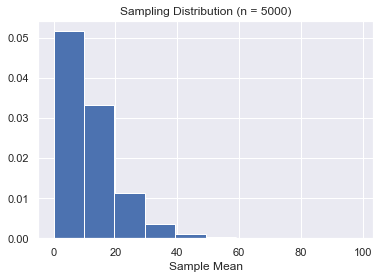

In [45]:
county['multi_unit'].hist(density = True)
plt.title('Sampling Distribution (n = 5000)')
plt.xlabel('Sample Mean')
plt.show()

#### 6.4. [1.5 pt] What percent of sample mean multi_unit rates in this sampling distribution are at least as large as the mean multi_unit rate of Champaign and it's four neighboring counties (calculated in 5.2)?

In [54]:
sample_perc = sample_dist_mean[sample_dist_mean['multi_unit'] >= 12.321896880967534]
four_count = sample_dist_mean['multi_unit'].count()
(sample_perc.count() / four_count) * 100

multi_unit    43.3
dtype: float64

#### 6.5. Which is more unusually high:
* the multi_unit rate of Champaign county,
* **or the average multi_unit rate of Champaign county and it's four neighboring counties?**

#### Explain.

The multi_unit rate in Champaign county was 28.6% and the average multi_unit rate of Champaign county and it's four neighboring counties was 43.3%, which is higher.